# Seguimiento de posición usando Filtro de Kalman

El filtro de Kalman es un algoritmo recursivo de estimación óptima para sistemas lineales con ruido gaussiano. Permite estimar el estado de un sistema dinámico (por ejemplo, la posición y velocidad de un objeto) a partir de mediciones ruidosas. El filtro realiza dos pasos en cada iteración: predicción (donde estima el siguiente estado y su incertidumbre) y actualización (donde corrige esa predicción usando la nueva medición). Es ampliamente utilizado en navegación, robótica y seguimiento de objetos debido a su eficiencia y precisión cuando se cumplen sus supuestos.


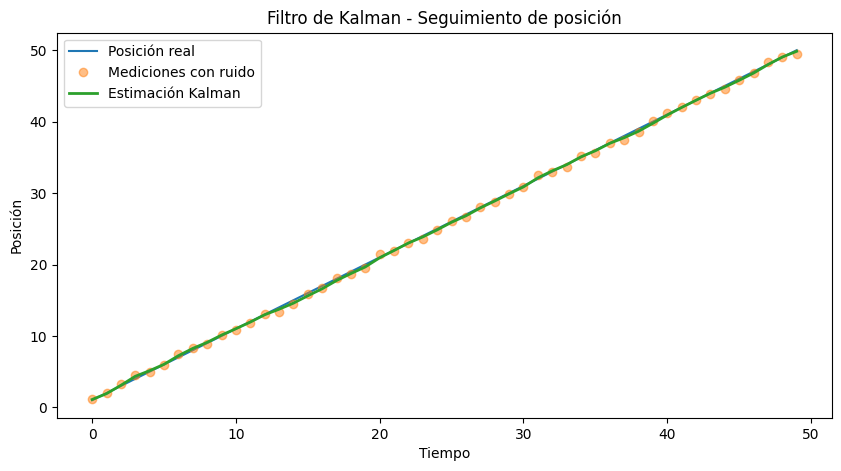

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
dt = 1.0
A = np.array([[1, dt], [0, 1]])
H = np.array([[1, 0]])
Q = np.array([[0.001, 0], [0, 0.001]])
R = np.array([[0.1]])
x = np.array([[0], [1]])  # estado real inicial
P = np.eye(2)

# Simulación de trayectoria real y mediciones
np.random.seed(42)
true_pos = []
measurements = []
for t in range(50):
    x = A @ x
    true_pos.append(x[0,0])
    z = H @ x + np.random.normal(0, np.sqrt(R[0,0]))
    measurements.append(z[0,0])

# Filtro de Kalman
x_est = np.array([[0], [0]])
P_est = np.eye(2)
estimates = []

for z in measurements:
    # Predicción
    x_pred = A @ x_est
    P_pred = A @ P_est @ A.T + Q

    # Actualización
    K = P_pred @ H.T @ np.linalg.inv(H @ P_pred @ H.T + R)
    x_est = x_pred + K @ (np.array([[z]]) - H @ x_pred)
    P_est = (np.eye(2) - K @ H) @ P_pred

    estimates.append(x_est[0,0])

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(true_pos, label="Posición real")
plt.plot(measurements, 'o', label="Mediciones con ruido", alpha=0.5)
plt.plot(estimates, label="Estimación Kalman", linewidth=2)
plt.legend()
plt.title("Filtro de Kalman - Seguimiento de posición")
plt.xlabel("Tiempo")
plt.ylabel("Posición")
plt.show()

En el gráfico se observa la comparación entre la posición real (línea azul), las mediciones ruidosas (puntos naranjas) y la estimación del filtro de Kalman (línea verde). El filtro suaviza el ruido de las mediciones y sigue de cerca la trayectoria real, mostrando cómo el algoritmo es capaz de estimar el estado verdadero a pesar de la presencia de ruido en las observaciones.